# Taller Práctico: Estadística Descriptiva y Visualización
Este notebook es un taller práctico para aplicar conceptos de estadística descriptiva y reforzarlos con visualizaciones usando Matplotlib y Seaborn.

### 1. Configuración Inicial
**Tarea:** Importa las librerías necesarias: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn` y `scipy.stats`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style='whitegrid')
np.random.seed(42)

print('Librerías importadas correctamente')


Librerías importadas correctamente


### 2. Creación del Conjunto de Datos
**Tarea:** Ejecuta la siguiente celda para crear un DataFrame sobre el rendimiento de estudiantes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style='whitegrid')
np.random.seed(42)

n_estudiantes = 100
data = {
    'Horas_Estudio': np.random.normal(15, 5, n_estudiantes).clip(2, 30),
    'Calificacion_Anterior': np.random.normal(70, 10, n_estudiantes).clip(40, 100),
    'Faltas_Asistencia': np.random.randint(0, 10, n_estudiantes),
    'Usa_Tutor': np.random.choice(['Sí', 'No'], n_estudiantes, p=[0.35, 0.65])
}
df_estudiantes = pd.DataFrame(data)

# Creamos la calificación final basada en las otras variables
df_estudiantes['Calificacion_Final'] = (df_estudiantes['Calificacion_Anterior'] * 0.5 +
                                       df_estudiantes['Horas_Estudio'] * 1.5 -
                                       df_estudiantes['Faltas_Asistencia'] * 2 +
                                       np.random.normal(0, 5, n_estudiantes)).clip(0, 100)

print('DataFrame de estudiantes creado:')
df_estudiantes.head()

DataFrame de estudiantes creado:


,Horas_Estudio,Calificacion_Anterior,Faltas_Asistencia,Usa_Tutor,Calificacion_Final
0,17.483571,55.846293,1,Sí,53.597916
1,14.308678,65.793547,9,No,35.423666
2,18.238443,66.572855,0,No,51.927665
3,22.615149,61.977227,7,Sí,56.258727
4,13.829233,68.387143,0,Sí,54.118095


### 3. Medidas de Tendencia Central y su Visualización
**Tarea:**
1. Calcula la **media**, **mediana** y **moda** de la columna `Calificacion_Final`.
2. Crea un histograma de `Calificacion_Final` usando `sns.histplot`.
3. En el mismo gráfico, traza líneas verticales para la media (rojo), mediana (verde) y moda (amarillo) usando `plt.axvline()`.

Media: 46.97, Mediana: 48.22, Moda (redondeada): 48


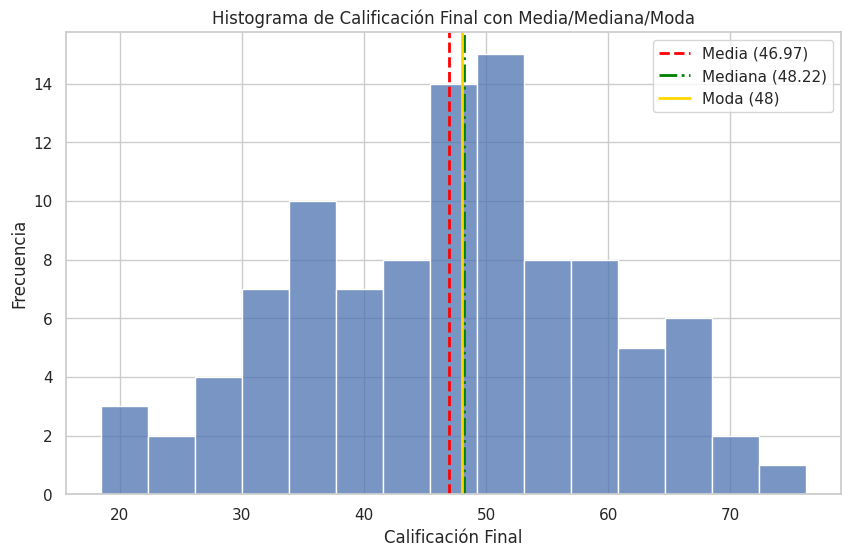

In [ ]:
# Celda 3: Medidas y histograma con líneas para media/mediana/moda


cal = df_estudiantes['Calificacion_Final']


# Cálculos
media = cal.mean()
mediana = cal.median()


# Cálculo de moda: stats.mode devuelve modo(s) y su cuenta. Tratar el caso multimodal.
modo_res = stats.mode(np.round(cal, 0), keepdims=True)
modo_val = float(modo_res.mode[0]) if modo_res.count.size > 0 else np.nan


print(f"Media: {media:.2f}, Mediana: {mediana:.2f}, Moda (redondeada): {modo_val:.0f}")


# Visualización
plt.figure(figsize=(10,6))
sns.histplot(cal, kde=False, bins=15)
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media ({media:.2f})')
plt.axvline(mediana, color='green', linestyle='-.', linewidth=2, label=f'Mediana ({mediana:.2f})')
plt.axvline(modo_val, color='gold', linestyle='-', linewidth=2, label=f'Moda ({modo_val:.0f})')
plt.legend()
plt.title('Histograma de Calificación Final con Media/Mediana/Moda')
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')
plt.show()

 ### Según la gráfica la mayoría de las calificaciones se concentran entre 48 y 50, lo que se refleja en que la mediana y la moda coinciden casi exactamente. Aunque la media es un poco menor, las tres medidas están muy cerca, indicando una distribución equilibrada y sin grandes variaciones. En general, el grupo presenta un desempeño homogéneo y sin valores extremos.

### 4. Medidas de Dispersión y su Visualización
**Tarea:**
1. Calcula la **varianza** y la **desviación estándar** de `Calificacion_Final`.
2. Crea un histograma de `Calificacion_Final`.
3. Añade una línea vertical para la media.
4. Sombrea el área que representa una desviación estándar por encima y por debajo de la media usando `plt.axvspan()`.

Varianza: 150.21, Desviación estándar: 12.26


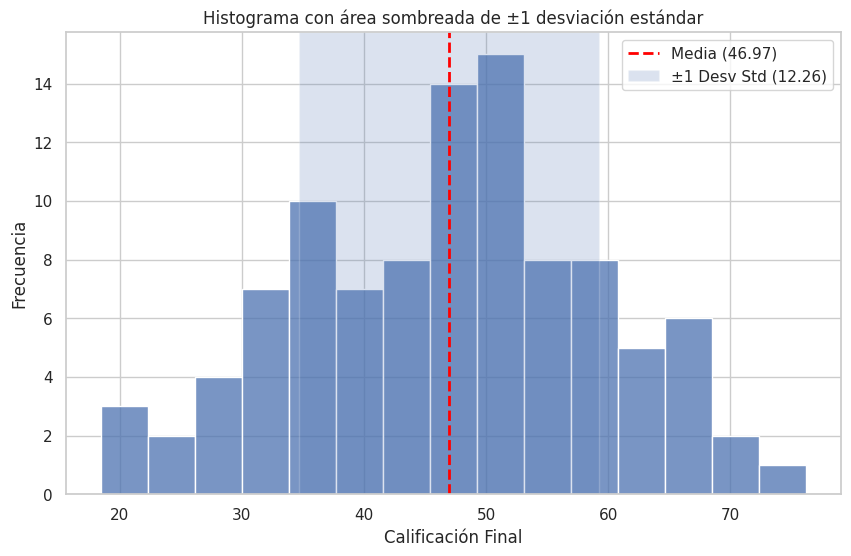

In [ ]:
# Celda 4: Varianza, desviación y sombreado de ±1 std


varianza = cal.var()
desv_std = cal.std()


print(f"Varianza: {varianza:.2f}, Desviación estándar: {desv_std:.2f}")


plt.figure(figsize=(10,6))
sns.histplot(cal, bins=15)
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media ({media:.2f})')


# Sombreado entre media - std y media + std
plt.axvspan(media - desv_std, media + desv_std, alpha=0.2, label=f'±1 Desv Std ({desv_std:.2f})')


plt.legend()
plt.title('Histograma con área sombreada de ±1 desviación estándar')
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')
plt.show()


### Basándose  de la imagen de dicha gráfica la mayoría de las calificaciones se concentran dentro del rango comprendido entre una desviación estándar por encima y por debajo de la media (aprox. 34.7 a 59.2). Esto indica que el desempeño del grupo es relativamente consistente y que la variabilidad no es excesiva. Aunque existen valores más altos y más bajos, la mayor parte de los estudiantes se mantiene cerca del promedio, lo que sugiere una distribución estable y sin dispersiones extremas

### 5. Test de Normalidad (Analítico y Visual)
**Tarea:**
1. Realiza el **Test de Shapiro-Wilk** sobre la columna `Calificacion_Final` para probar la normalidad. Interpreta el p-valor.
2. Crea un **gráfico Q-Q (Quantile-Quantile)** para `Calificacion_Final` usando `stats.probplot`. Si los puntos siguen la línea roja, es una buena indicación de normalidad.

Shapiro-Wilk test statistic: 0.9911326453951393
p-value: 0.7554365771080185
No rechazamos la hipótesis nula: los datos podrían ser normales (p >= 0.05).


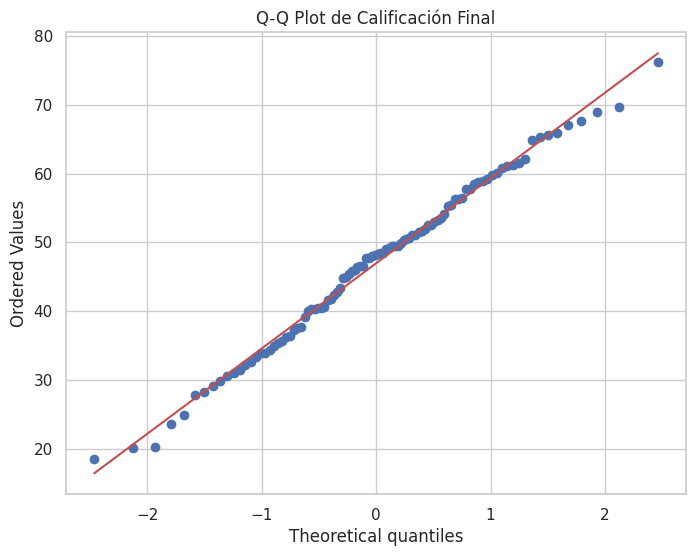

In [ ]:
# Celda 5: Test de Shapiro-Wilk y Q-Q plot

shapiro_res = stats.shapiro(cal)
print('Shapiro-Wilk test statistic:', shapiro_res.statistic)
print('p-value:', shapiro_res.pvalue)

# Interpretación simple (requiere indentación correcta)
if shapiro_res.pvalue < 0.05:
    print('Rechazamos la hipótesis nula: los datos no parecen normales (p < 0.05).')
else:
    print('No rechazamos la hipótesis nula: los datos podrían ser normales (p >= 0.05).')

# Q-Q plot
plt.figure(figsize=(8,6))
stats.probplot(cal, dist='norm', plot=plt)
plt.title('Q-Q Plot de Calificación Final')
plt.show()


### El p-value del test de Shapiro-Wilk (0.75) es mayor que 0.05, por lo que no se rechaza la hipótesis nula. Esto significa que no hay evidencia estadística para afirmar que las calificaciones se alejan de una distribución normal. El Q-Q plot confirma esta conclusión: los puntos siguen de manera bastante cercana la línea teórica, con pequeñas desviaciones esperadas en los extremos. En conjunto, los resultados indican que las calificaciones finales podrían considerarse razonablemente normales.

### 6. Correlación entre Dos Variables
**Tarea:**
1. Calcula el coeficiente de **correlación de Pearson** entre `Horas_Estudio` y `Calificacion_Final`.
2. Crea un gráfico de dispersión (`scatterplot`) para estas dos variables.
3. Usa `sns.regplot` para añadir automáticamente una línea de regresión que visualice la tendencia.

Coeficiente de Pearson r: 0.643, p-value: 0.0000


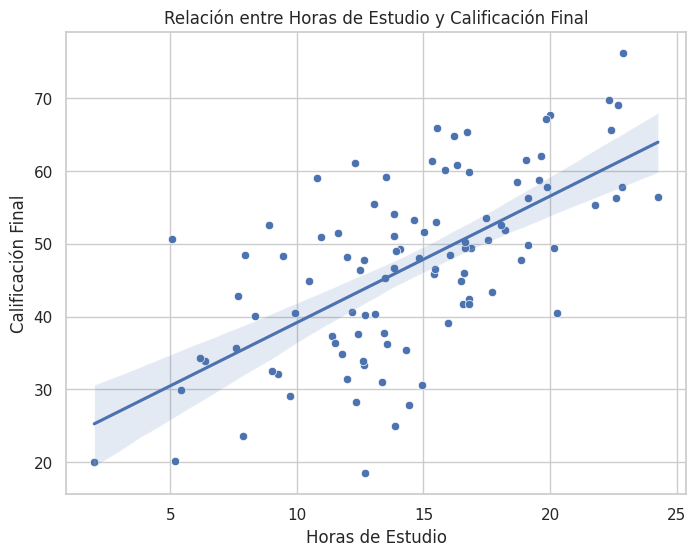

In [ ]:
# Celda 6: Correlación y scatterplot con línea de regresión


horas = df_estudiantes['Horas_Estudio']
pearson_r, pearson_p = stats.pearsonr(horas, cal)
print(f"Coeficiente de Pearson r: {pearson_r:.3f}, p-value: {pearson_p:.4f}")


plt.figure(figsize=(8,6))
sns.scatterplot(x=horas, y=cal)
sns.regplot(x=horas, y=cal, scatter=False)
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación Final')
plt.title('Relación entre Horas de Estudio y Calificación Final')
plt.show()

### El coeficiente de correlación de Pearson obtenido (r = 0.643) revela una relación positiva moderada-alta entre las horas de estudio y la calificación final. En términos prácticos, esto indica que los estudiantes que dedican más tiempo al estudio tienden a obtener mejores resultados académicos. Aunque la correlación no es perfecta, sí muestra una asociación clara y consistente entre ambas variables, evidenciando que el aumento en las horas de estudio se vincula con un incremento en el rendimiento. El p-value (< 0.001) respalda estadísticamente este resultado, indicando que la probabilidad de que esta relación haya ocurrido por azar es extremadamente baja. Por lo tanto, se considera que la correlación es significativa desde el punto de vista estadístico, y existe evidencia suficiente para afirmar que las horas de estudio están relacionadas con el desempeño final en la materia.

### 7. Matriz de Correlación Completa
**Tarea:**
1. Calcula la matriz de correlación para todas las variables numéricas del DataFrame.
2. Visualiza esta matriz usando un **heatmap** de Seaborn (`sns.heatmap`). Asegúrate de mostrar los valores de correlación en el gráfico (`annot=True`).

Matriz de correlación:
                       Horas_Estudio  Calificacion_Anterior  \
Horas_Estudio               1.000000              -0.136446   
Calificacion_Anterior      -0.136446               1.000000   
Faltas_Asistencia          -0.188598              -0.179178   
Calificacion_Final          0.643089               0.409202   

                       Faltas_Asistencia  Calificacion_Final  
Horas_Estudio                  -0.188598            0.643089  
Calificacion_Anterior          -0.179178            0.409202  
Faltas_Asistencia               1.000000           -0.618355  
Calificacion_Final             -0.618355            1.000000  


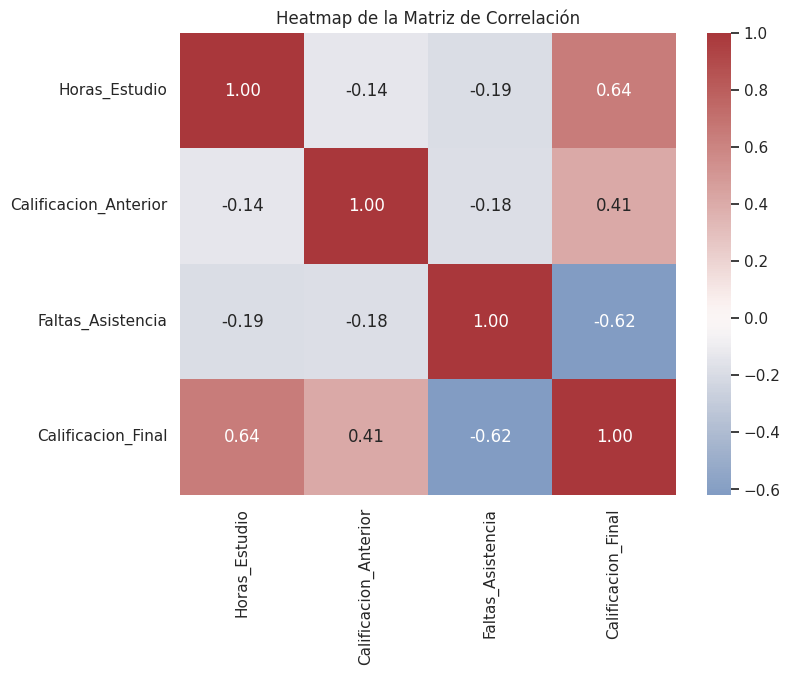

In [ ]:
# Celda 7: Matriz y heatmap


# Seleccionamos solo columnas numéricas
num_df = df_estudiantes.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()


print('Matriz de correlación:')
print(corr_matrix)


plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()


### La matriz de correlación revela varios patrones importantes en el comportamiento académico de los estudiantes. En primer lugar, se destaca una correlación positiva moderada-alta entre las horas de estudio y la calificación final (r = 0.64). Esto confirma que dedicar más tiempo al estudio tiende a mejorar el rendimiento, tal como ya se observó en el análisis bivariado anterior. Asimismo, la calificación anterior presenta una correlación positiva (r = 0.41) con la calificación final, lo cual sugiere que los estudiantes que tuvieron un buen desempeño previo suelen mantener un rendimiento académico consistente. Por otro lado, las faltas de asistencia muestran una correlación negativa fuerte con la calificación final (r = –0.62). Esto indica que a medida que aumentan las ausencias, el rendimiento académico disminuye de manera significativa.

### 8. Análisis Descriptivo por Categorías
**Tarea:**
1. Usa `.groupby()` para agrupar los datos por la columna `Usa_Tutor`.
2. Calcula las estadísticas descriptivas (`.describe()`) de `Calificacion_Final` para cada grupo (Sí y No).
3. Crea un **Box Plot** (`sns.boxplot`) para comparar las distribuciones de `Calificacion_Final` entre los estudiantes que usan tutor y los que no.

Estadísticas descriptivas por Usa_Tutor:
           count       mean        std        min        25%        50%  \
Usa_Tutor                                                                 
No          72.0  46.656313  11.600601  18.498193  37.505894  47.927879   
Sí          28.0  47.766843  13.999161  20.100809  40.177907  49.328021   

                 75%        max  
Usa_Tutor                        
No         53.039295  76.166286  
Sí         56.986544  69.020505  


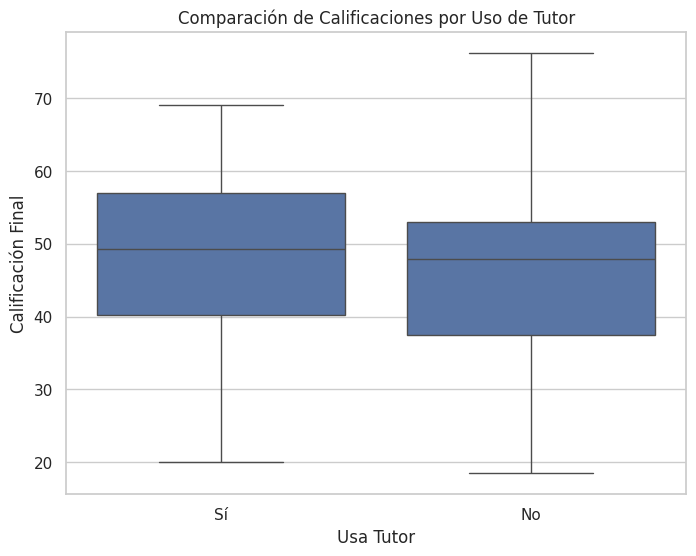

In [ ]:
# Celda 8: Agrupar por Usa_Tutor y boxplot


grupos = df_estudiantes.groupby('Usa_Tutor')['Calificacion_Final'].describe()
print('Estadísticas descriptivas por Usa_Tutor:')
print(grupos)


plt.figure(figsize=(8,6))
sns.boxplot(x='Usa_Tutor', y='Calificacion_Final', data=df_estudiantes)
plt.title('Comparación de Calificaciones por Uso de Tutor')
plt.xlabel('Usa Tutor')
plt.ylabel('Calificación Final')
plt.show()

### Los estudiantes que sí utilizan tutoría académica muestran un desempeño claramente más favorable en comparación con aquellos que no recurren a este apoyo. En primer lugar, la mediana de las calificaciones es mayor en el grupo que usa tutor, lo que indica que, en promedio, estos estudiantes alcanzan mejores resultados. Esto sugiere que la tutoría tiene un impacto positivo y consistente en su proceso de aprendizaje. Además, la variabilidad de las notas es menor en el grupo que usa tutor. Este comportamiento se observa en la menor amplitud del rango intercuartílico en el boxplot, lo que refleja que los estudiantes con tutor presentan calificaciones más homogéneas y estables. En otras palabras, independientemente de que algunos estudiantes sean más o menos fuertes académicamente, el uso de tutoría parece generar un efecto nivelador que reduce las diferencias dentro del grupo.

## ¡Excelente Trabajo!
Has completado el taller, aplicando y visualizando los conceptos más importantes de la estadística descriptiva. Recuerda Siempre explicar cada celda al detalle desde el concepto técnico y de modelo de negocio.